<a href="https://colab.research.google.com/github/rayPriyanka1/Research-Through-Data-Science/blob/main/DAY%206/Day_6_Assignment_Decission_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****

**Question 1: Find the Best Tree Depth

Task: Test depths 3, 4, 5 and find highest accuracy

Optional: Feature: 10; test depths 5,6,7,8,9


Question 2: Calculate All Metrics

Task: Use best depth to calculate precision, recall, F1-score


Question 3: Test on New Patients

Question 4: Analyze Confusion Matrix**

In [50]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the dataset**

In [51]:
print("Reading the real cancer dataset...")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/Datasets/Breast_Cancer_Wisconsin_Dataset.csv')

print(f"Dataset loaded! We have data from {len(data)} real patients")
print(f"Each patient has {len(data.columns)-2} medical measurements")

# Show first few patients
print("\nFirst 5 patients in our dataset:")
print(data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean']].head())

# Understand diagnosis column
print(f"\nUnderstanding Diagnosis:")
diagnosis_counts = data['diagnosis'].value_counts()
print(f"M (Malignant = Dangerous Cancer):  {diagnosis_counts['M']} patients")
print(f"B (Benign = Harmless Cancer):      {diagnosis_counts['B']} patients")
print(f"Total patients:                    {len(data)} patients")

Reading the real cancer dataset...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded! We have data from 569 real patients
Each patient has 31 medical measurements

First 5 patients in our dataset:
         id diagnosis  radius_mean  texture_mean  area_mean
0    842302         M        17.99         10.38     1001.0
1    842517         M        20.57         17.77     1326.0
2  84300903         M        19.69         21.25     1203.0
3  84348301         M        11.42         20.38      386.1
4  84358402         M        20.29         14.34     1297.0

Understanding Diagnosis:
M (Malignant = Dangerous Cancer):  212 patients
B (Benign = Harmless Cancer):      357 patients
Total patients:                    569 patients


# **Prepare the dataset**

In [52]:

print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion Done!")

# Select only the most important features (10 features!)
important_features = [
    'radius_mean',
    'texture_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concave points_mean',
    'concavity_mean',
    'fractal_dimension_mean',
    'radius_se',
    'texture_se',
    ]


# Create simple dataset
X = data[important_features]
y = data['diagnosis_numeric']

print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion Done!

Data prepared:
X (measurements): (569, 10)
y (diagnosis): (569,)


# **Train and Test Split**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients")
print(f"Testing:  {len(X_test)} patients")

# Show some training examples
print(f"\n Training Examples:")
print(X_train.head())

Training: 455 patients
Testing:  114 patients

 Training Examples:
     radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean  \
412        9.397         21.68      268.8          0.07969           0.06053   
461       27.420         26.27     2501.0          0.10840           0.19880   
532       13.680         16.33      575.5          0.09277           0.07255   
495       14.870         20.21      680.9          0.09587           0.08345   
13        15.850         23.95      782.7          0.08401           0.10020   

     concave points_mean  concavity_mean  fractal_dimension_mean  radius_se  \
412             0.005128         0.03735                 0.06724     0.1186   
461             0.168900         0.36350                 0.05623     2.5470   
532             0.018800         0.01752                 0.06155     0.2047   
495             0.049510         0.06824                 0.05748     0.2323   
13              0.053640         0.09938                 

# **Decision Tree(using Depth 5)**

In [54]:
# Train the model
trained_doctor = DecisionTreeClassifier(
    max_depth=5,
    random_state=20
)

print("Teaching model doctor with training data...")

trained_doctor.fit(X_train, y_train)
print("Model doctor training completed!")

Teaching model doctor with training data...
Model doctor training completed!


In [55]:
prediction= trained_doctor.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")


Skill Morph Doctor Accuracy: 0.904 (90.4%)
GOOD! Our Skill Morph doctor performs well!


In [56]:
# Predict new patient cancer using trained model

new_patient = [[14.5,   # radius_mean
                20.1,   # texture_mean
                400.0,  # area_mean
                0.10,   # smoothness_mean
                0.20,   # compactness_mean
                0.05,   # concave points_mean
                0.15,   # concavity_mean
                0.06,   # fractal_dimension_mean
                0.45,   # radius_se
                1.20]]  # texture_se
new_patient_prediction= trained_doctor.predict(new_patient)
if new_patient_prediction==1: print("The new patient has MALIGNANT cancer!")
else: print("The new patient has BENIGN cancer")

The new patient has BENIGN cancer


Confusion Matrix (Mistake Analysis):
[[58  8]
 [ 3 45]]

How to read Confusion Matrix:

                 Skill Morph Predicted
              Benign   Malignant
Actual Benign     58        8
Actual Malignant  3        45

✅ Correct Predictions: 103
❌ Wrong Predictions: 11

⚠️ DANGER: Missing malignant cancer (3 cases) is more dangerous than false alarms (8 cases)



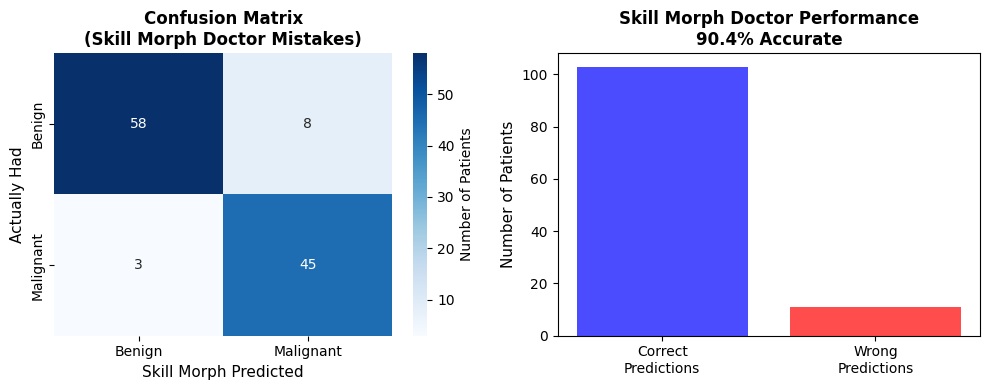

In [57]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              Benign   Malignant
Actual Benign     {cm[0,0]}        {cm[0,1]}
Actual Malignant  {cm[1,0]}        {cm[1,1]}

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing malignant cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['Blue', 'Red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

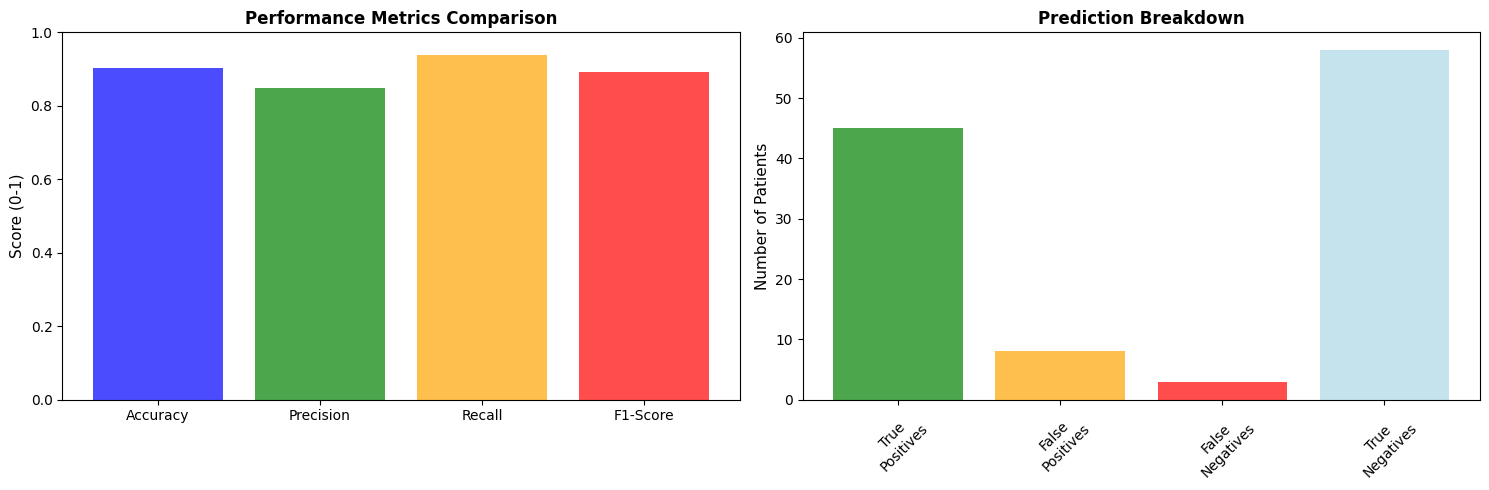

In [58]:
# Calculate detailed metrics
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)


# Create detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)



# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
# Create a simple precision-recall visualization
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Decision Tree(using Depth 7)**

In [59]:
#train the model
trained_doctor = DecisionTreeClassifier(
    max_depth=7,
    random_state=20)

trained_doctor.fit(X_train, y_train)
print("Model doctor training completed!")

prediction= trained_doctor.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

Model doctor training completed!

Skill Morph Doctor Accuracy: 0.895 (89.5%)
OK! Our Skill Morph doctor is decent!


Confusion Matrix (Mistake Analysis):
[[56 10]
 [ 4 44]]

How to read Confusion Matrix:

                Skill Morph Predicted
              Benign   Malignant
Real Benign     56        10  
Real Malignant  4        44   

✅ Correct Predictions: 100
❌ Wrong Predictions: 14





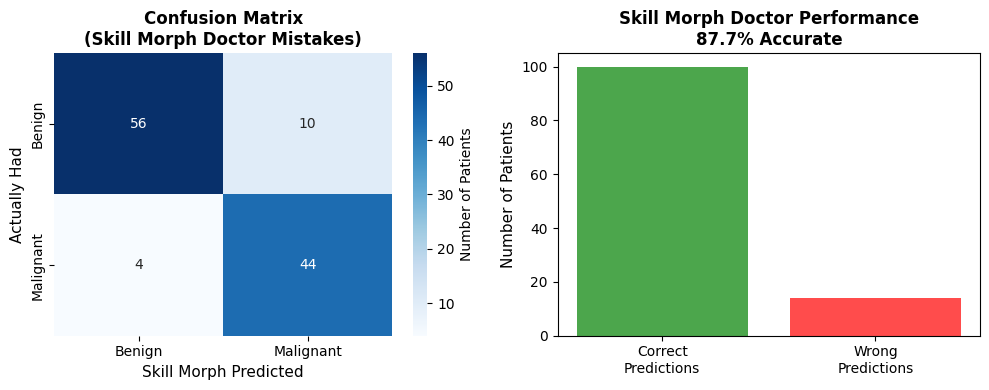

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
                Skill Morph Predicted
              Benign   Malignant
Real Benign     {cm[0,0]}        {cm[0,1]}
Real Malignant  {cm[1,0]}        {cm[1,1]}

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}


""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

# **Decision Tree(using Depth 9)**

In [60]:
trained_doctor = DecisionTreeClassifier(
    max_depth=9,
    random_state=20
)
# Train the model
trained_doctor.fit(X_train, y_train)
print("Model doctor training completed!")

#Prediction calculation

prediction= trained_doctor.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

Model doctor training completed!

Skill Morph Doctor Accuracy: 0.877 (87.7%)
OK! Our Skill Morph doctor is decent!


Confusion Matrix (Mistake Analysis):
[[56 10]
 [ 4 44]]

How to read Confusion Matrix:

                 Skill Morph Predicted
              Benign   Malignant
Real Benign     56        10
Real Malignant  4        44

✅ Correct Predictions: 100
❌ Wrong Predictions: 14




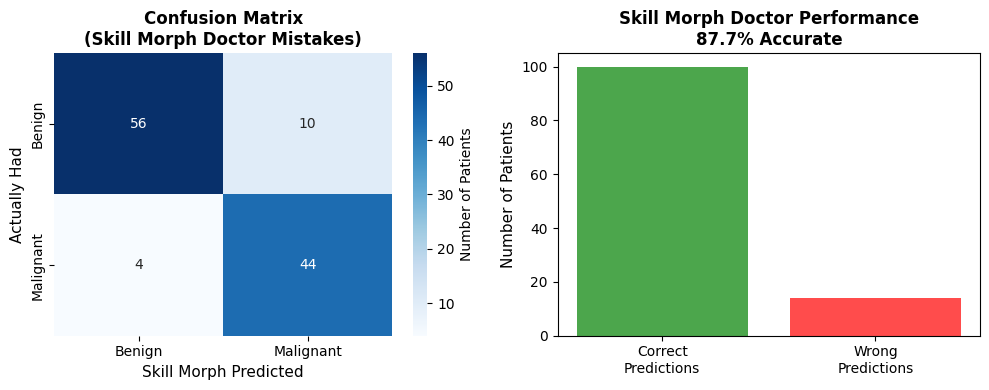

In [61]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              Benign   Malignant
Real Benign     {cm[0,0]}        {cm[0,1]}
Real Malignant  {cm[1,0]}        {cm[1,1]}

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

**Accuracy rate is different from each depth.
After Applying Max Depth=5 Accuracy Rate is 0.904 (90.4%).
After Applying Max Depth=7 Accuracy Rate is 0.895 (89.5%).
After Applying Max Depth=9 Accuracy Rate is 0.877 (87.7%).
in every case I apply 10 same feactures.but Accuracy rate are different for different depth!!!
**